In [3]:
from sklearn.datasets import load_breast_cancer
from dynamodelx import UFA
from dynamodelx.plots import draw_plots

In [4]:
X, y = load_breast_cancer(return_X_y=True)

In [38]:
ufa = UFA(
    task='classification', 
    model_size=None, # None because I want to use my own architecture. 
    input_dim=X.shape[1],
    output_dim=1, # Single output neuron for binary classification, since the model will be using sigmoid activation function.
    loss='binary_cross_entropy',
    device='cuda',
    custom_architecture=[3],
    weights_init='xavier',
    hidden_activation='tanh',
    optimizer='adam',
    return_metrics=True,
    auto_build=True,
    multiclass=False, # Since it's binary classification
    uncertainty=False
)

performance = ufa.train(
                    X=X,
                    y=y,
                    epochs=50,
                    learning_rate=0.01,
                    momentum=None,
                    val_size=0.2,
                    test_size=0.1,
                    batch_size=32
                )

Model Configuration:

  Task:               classification
  Model Size:         Custom
  Input Dimension:    30
  Output Dimension:   1
  Loss                binary_cross_entropy
  Device:             cuda
  Hidden Activation:  tanh
  Optimizer:          adam
  Weights Init:       xavier
  Uncertainty:        False
  Multiclass:         False
  Custom Architecture:[3]

Building the model ...

===== Built Model =====
Linear(in_features=30, out_features=3, bias=True)
Tanh()
Linear(in_features=3, out_features=1, bias=True)

Total parameters: 97
Trainable parameters: 97
Non-trainable parameters: 0

Model successfully built

Average train loss per sample : 0.045233817771077156 
Average validation loss per sample : 0.054200790097228196

Average test loss per sample: 0.012227590861065047
Confusion matrix on test data: 
 [[15  0]
 [ 0 41]]


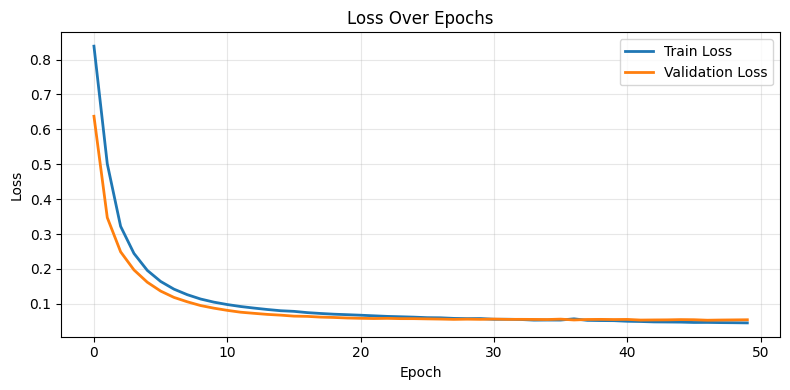

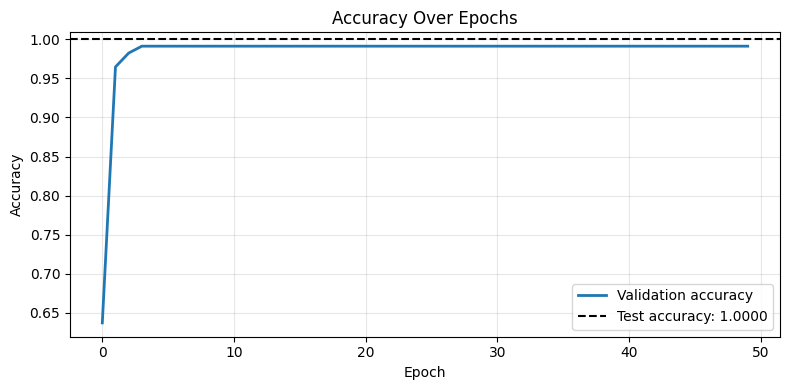

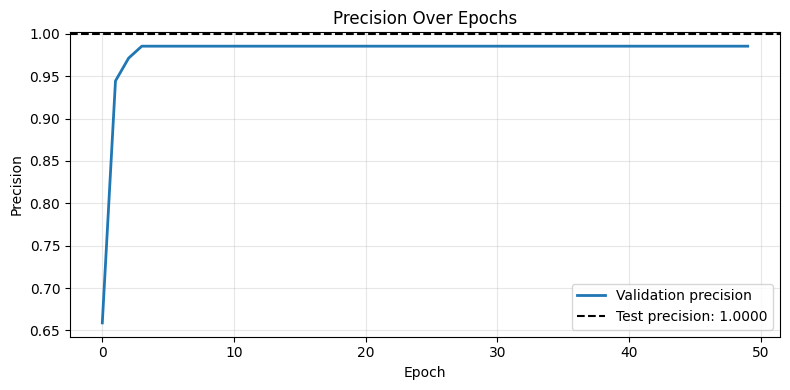

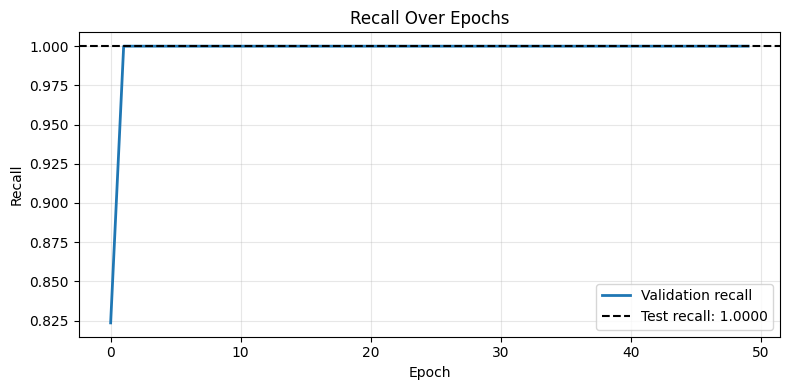

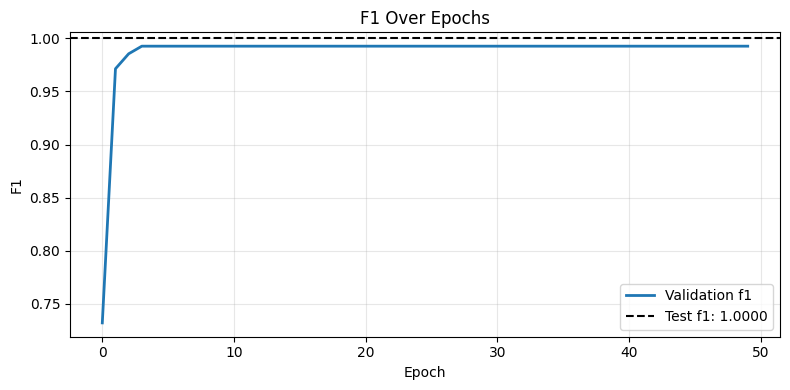

In [39]:
draw_plots(performance)

In [40]:
performance.test

{'test_accuracy': 1.0,
 'test_precision': 1.0,
 'test_recall': 1.0,
 'test_f1': 1.0}

In [45]:
predictions = ufa.predict(X[:5])
print(predictions, all(predictions == y[:5]))

[0 0 0 0 0] True


In [46]:
ufa.save(path='breast_cancer_classification.pt')

Model successfully saved to: breast_cancer_classification.pt
